In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [59]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MX.csv")

In [60]:
df.head()

,weight,Finished,RecordedDate,B2,B4,E5,ISO_3,country_agg,region_agg,date_from_file,date,ISO2,age,B1_1.1,B1_1.2,B1_1.NA,B1_2.1,B1_2.2,B1_2.NA,B1_3.1,B1_3.2,B1_3.NA,B1_4.1,B1_4.2,B1_4.NA,B1_5.1,B1_5.2,B1_5.NA,B1_6.1,B1_6.2,B1_6.NA,B1_7.1,B1_7.2,B1_7.NA,B1_8.1,B1_8.2,B1_8.NA,B1_9.1,B1_9.2,B1_9.NA,...,C6.NA,D1.1,D1.2,D1.3,D1.4,D1.5,D1.NA,D2.1,D2.2,D2.3,D2.4,D2.5,D2.NA,D3.1,D3.2,D3.3,D3.4,D3.NA,D4.1,D4.2,D4.3,D4.4,D4.NA,E3.1,E3.2,E3.3,E3.4,E3.NA,E4.1,E4.2,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
0,18448.322743,0,2021-01-01 04:01:58,NaN,NaN,NaN,MEX,Mexico,Guerrero,2021-01-01,2021-01-01,MX,NaN,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,5132.971216,1,2021-01-01 00:23:08,4.0,4.0,4.0,MEX,Mexico,Coahuila,2021-01-01,2021-01-01,MX,5.0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,6582.339932,0,2021-01-01 04:05:49,NaN,NaN,NaN,MEX,Mexico,Veracruz,2021-01-01,2021-01-01,MX,NaN,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,6116.320344,1,2021-01-01 00:13:34,3.0,6.0,2.0,MEX,Mexico,Hidalgo,2021-01-01,2021-01-01,MX,4.0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,7180.042750,1,2021-01-01 00:09:45,5.0,1.0,2.0,MEX,Mexico,Coahuila,2021-01-01,2021-01-01,MX,1.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [61]:
df.shape

(1181932, 145)

# Pre-processing dataframe

In [62]:
df.columns.values



array(['weight', 'Finished', 'RecordedDate', 'B2', 'B4', 'E5', 'ISO_3',
       'country_agg', 'region_agg', 'date_from_file', 'date', 'ISO2',
       'age', 'B1_1.1', 'B1_1.2', 'B1_1.NA', 'B1_2.1', 'B1_2.2',
       'B1_2.NA', 'B1_3.1', 'B1_3.2', 'B1_3.NA', 'B1_4.1', 'B1_4.2',
       'B1_4.NA', 'B1_5.1', 'B1_5.2', 'B1_5.NA', 'B1_6.1', 'B1_6.2',
       'B1_6.NA', 'B1_7.1', 'B1_7.2', 'B1_7.NA', 'B1_8.1', 'B1_8.2',
       'B1_8.NA', 'B1_9.1', 'B1_9.2', 'B1_9.NA', 'B1_10.1', 'B1_10.2',
       'B1_10.NA', 'B1_11.1', 'B1_11.2', 'B1_11.NA', 'B1_12.1', 'B1_12.2',
       'B1_12.NA', 'B3.1', 'B3.2', 'B3.NA', 'B5.1', 'B5.2', 'B5.NA',
       'B6.1', 'B6.2', 'B6.NA', 'B7.1', 'B7.2', 'B7.NA', 'B8.1', 'B8.2',
       'B8.3', 'B8.NA', 'C0_1.1', 'C0_1.2', 'C0_1.NA', 'C0_2.1', 'C0_2.2',
       'C0_2.NA', 'C0_3.1', 'C0_3.2', 'C0_3.NA', 'C0_4.1', 'C0_4.2',
       'C0_4.NA', 'C0_5.1', 'C0_5.2', 'C0_5.NA', 'C0_6.1', 'C0_6.2',
       'C0_6.NA', 'C1_m.1', 'C1_m.2', 'C1_m.NA', 'C2.1', 'C2.2', 'C2.3',
       'C2.4

In [63]:
df1 = df.drop(df[df['B7.1']==0].index)

In [64]:
df2 = df1.drop(df1[df1['B8.NA']==1].index)

In [65]:
df3 = df2.drop(df2[df2['B8.3']==1].index)

In [66]:
# dataframe filter
df_filter = df3

In [67]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA']

for i in range(len(col_names)):
  df_filter_na = df_filter.drop(df_filter[df_filter[col_names[i]]==1].index)

In [68]:
df_filter_na.shape

(85502, 145)

In [69]:
# dataframe without NA
df_no_na = df_filter_na

In [71]:
# dataframe with NA

df_NA = df_filter

# Creating our dataframe

In [72]:
df1_ok = df_no_na[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1']]

df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1']]

In [73]:
df1_ok.shape

(85502, 13)

In [74]:
df_ok_NA.shape

(86062, 25)

# Data Visualization

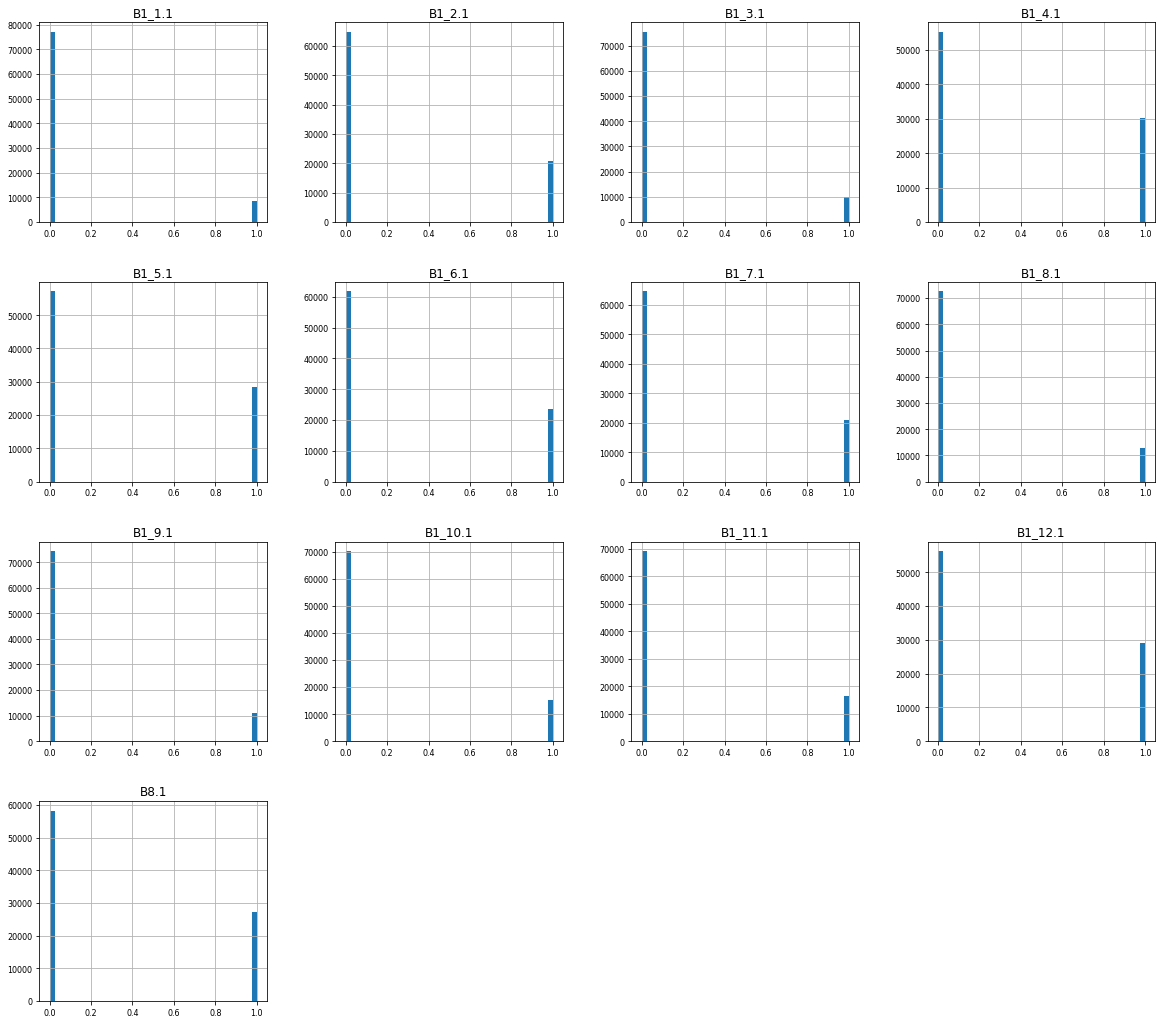

In [75]:
df1_ok.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

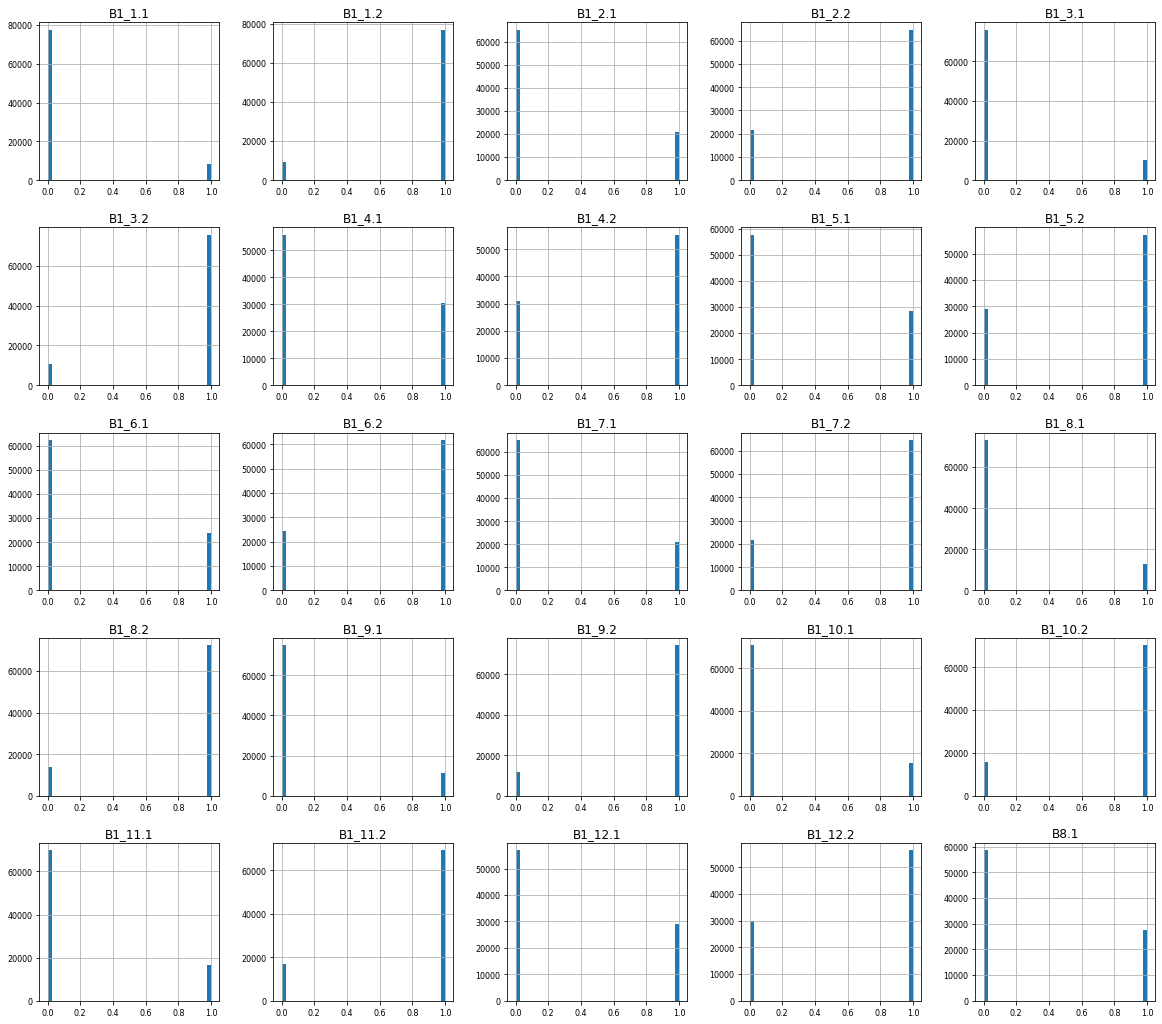

In [76]:
df_ok_NA.hist(figsize=(20, 18), bins=40, xlabelsize=8, ylabelsize=8, )
plt.show()

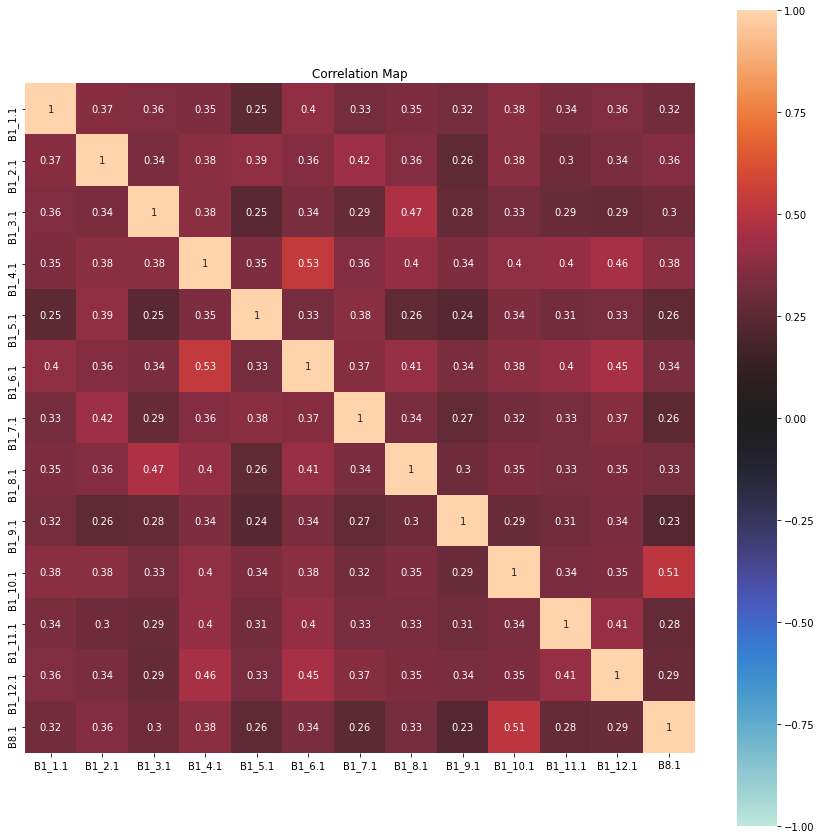

In [77]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df1_ok.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

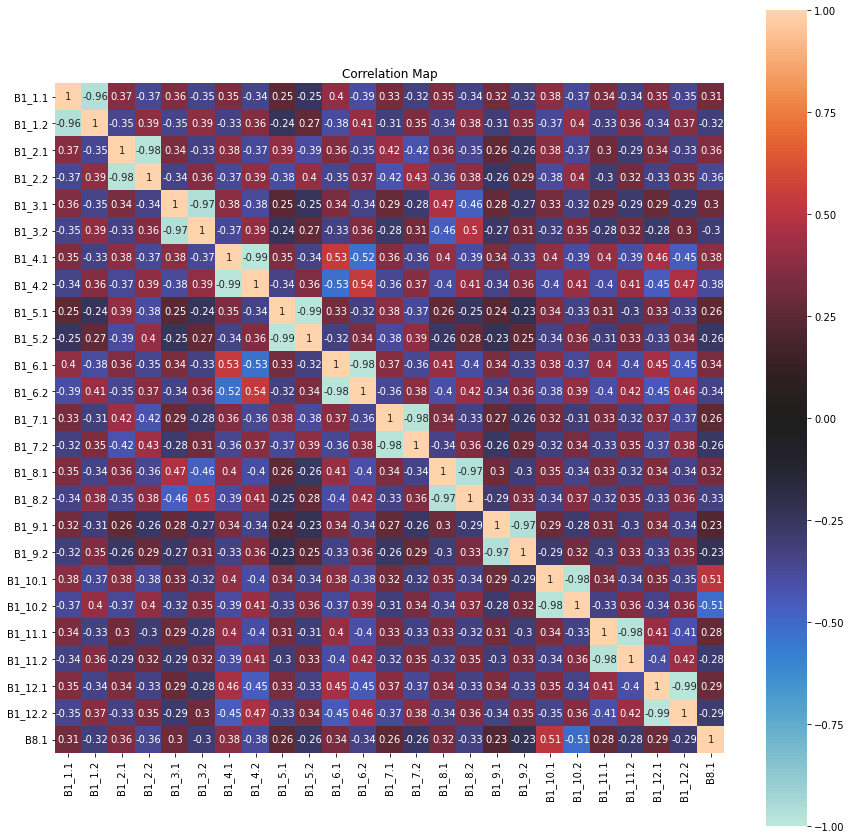

In [78]:
f, ax = plt.subplots(figsize=(15, 15))
corr = df_ok_NA.corr()
sns.heatmap(corr,annot=True, vmin = -1, vmax = 1, square = True, center =0, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Correlation Map')
plt.show()

### Output

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a50a77950>]],
      dtype=object)

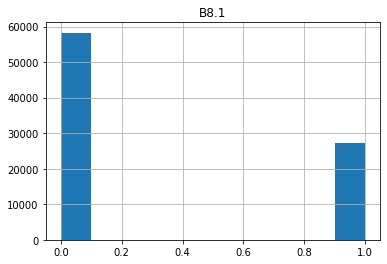

In [79]:
df1_ok.hist('B8.1')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a4eb96b50>]],
      dtype=object)

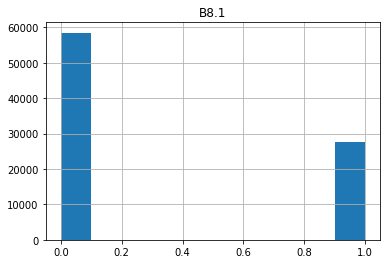

In [80]:
df_ok_NA.hist('B8.1')

# Training & Test

In [81]:
X = df1_ok.drop(['B8.1'], axis=1)
Y = df1_ok['B8.1']

X_NA = df_ok_NA.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA['B8.1']

Class=0, n=58258 (68.136%)
Class=1, n=27244 (31.864%)


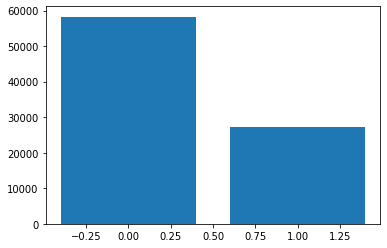

In [82]:
from collections import Counter
from matplotlib import pyplot
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [83]:
from imblearn.under_sampling import NearMiss

#undersample = NearMiss(version=3, n_neighbors_ver3=3)
undersample = NearMiss(version=1, n_neighbors=3,random_state=11)
# transform the dataset
X, Y = undersample.fit_resample(X, Y)
X_NA, Y_NA = undersample.fit_resample(X_NA, Y_NA)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Class=0, n=27244 (50.000%)
Class=1, n=27244 (50.000%)


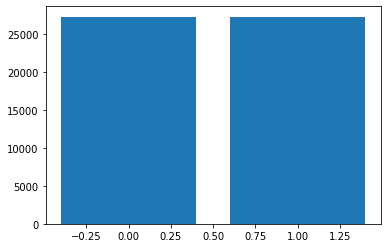

In [84]:
counter = Counter(Y)
for k,v in counter.items():
	per = v / len(Y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=27544 (50.000%)
Class=1, n=27544 (50.000%)


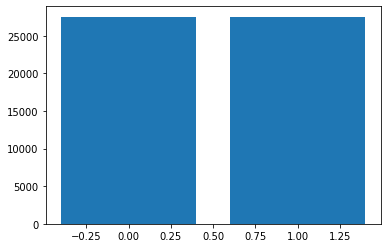

In [85]:
counter = Counter(Y_NA)
for k,v in counter.items():
	per = v / len(Y_NA) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [87]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(43590, 12)
(10898, 12)
(43590,)
(10898,)

(44070, 24)
(11018, 24)
(44070,)
(11018,)


In [ ]:
'''
X_norm = preprocessing.scale(X_train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
print(X_train_norm.shape)
print(X_test_norm.shape)
'''

'\nX_norm = preprocessing.scale(X_train)\nscaler = preprocessing.StandardScaler().fit(X_train)\nX_train_norm = scaler.transform(X_train)\nX_test_norm = scaler.transform(X_test)\nprint(X_train_norm.shape)\nprint(X_test_norm.shape)\n'

## Decision Tree

### df1_ok

In [88]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [89]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)


{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 50}


Accuracy: 0.7639016333272161
              precision    recall  f1-score   support

           0       0.72      0.85      0.78      5450
           1       0.82      0.68      0.74      5448

    accuracy                           0.76     10898
   macro avg       0.77      0.76      0.76     10898
weighted avg       0.77      0.76      0.76     10898

[[4647  803]
 [1770 3678]]


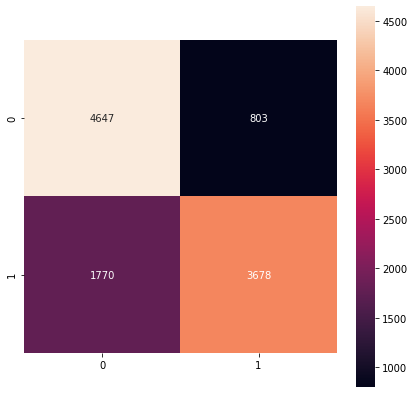

In [90]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_model.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))


In [91]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

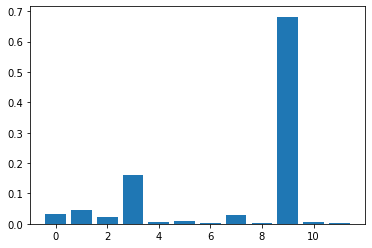

In [92]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [93]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('MX_tree_df1_ok.png')

True

### df_ok_NA

In [94]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [95]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 50}


Accuracy: 0.7623888182973316
              precision    recall  f1-score   support

           0       0.72      0.87      0.78      5496
           1       0.83      0.66      0.74      5522

    accuracy                           0.76     11018
   macro avg       0.77      0.76      0.76     11018
weighted avg       0.77      0.76      0.76     11018

[[4758  738]
 [1880 3642]]


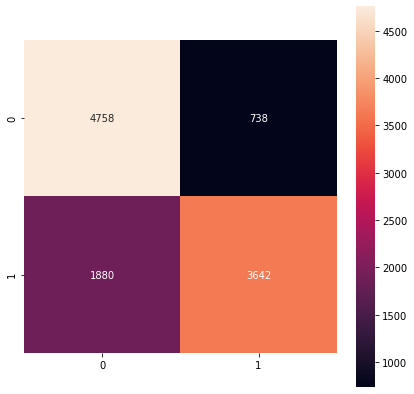

In [96]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_model_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [97]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

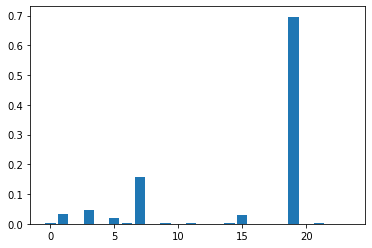

In [98]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [99]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2']
dot_data = export_graphviz(my_tree_NA,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('MX_tree_df_ok_NA.png')

True

## Random Forest

### df1_ok

In [100]:
rfc=RandomForestClassifier(random_state=42)

In [101]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [102]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [103]:
my_model = CV_rfc.best_estimator_
RF =my_model.fit(X_train, Y_train)


In [104]:
y_pred = RF.predict(X_test)

Accuracy: 0.7679390713892458
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      5450
           1       0.83      0.67      0.74      5448

    accuracy                           0.77     10898
   macro avg       0.78      0.77      0.77     10898
weighted avg       0.78      0.77      0.77     10898

[[4713  737]
 [1792 3656]]


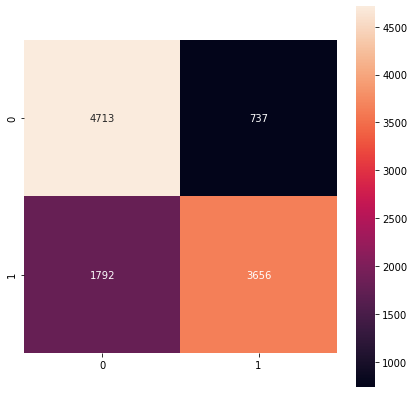

In [105]:
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_pred))

### df_ok_NA

In [106]:
rfc_NA=RandomForestClassifier(random_state=42)

In [107]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [108]:
CV_rfc_NA = GridSearchCV(estimator=rfc_NA, param_grid=param_grid, cv= 3)
CV_rfc_NA.fit(X_train_NA, Y_train_NA)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [109]:
CV_rfc_NA.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [110]:
my_model_NA = CV_rfc_NA.best_estimator_
RF_NA =my_model_NA.fit(X_train_NA, Y_train_NA)

In [111]:
y_pred_NA = RF_NA.predict(X_test_NA)

Accuracy: 0.764294790343075
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      5496
           1       0.84      0.66      0.74      5522

    accuracy                           0.76     11018
   macro avg       0.78      0.76      0.76     11018
weighted avg       0.78      0.76      0.76     11018

[[4783  713]
 [1884 3638]]


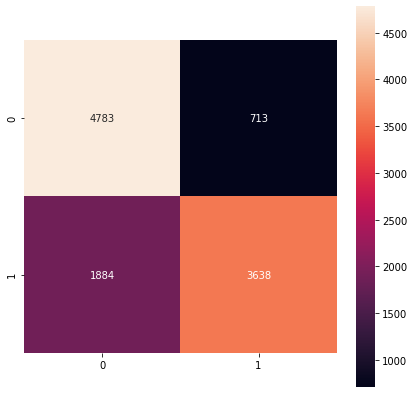

In [112]:
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))
matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_pred_NA))

## KNN

### df1_ok

In [137]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model=KNeighborsClassifier()

grid = GridSearchCV(kNN_model, param_grid, cv = 3, scoring = 'accuracy')
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 43}


In [138]:
my_model = grid.best_estimator_

Accuracy: 0.7636263534593504
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      5450
           1       0.84      0.65      0.73      5448

    accuracy                           0.76     10898
   macro avg       0.78      0.76      0.76     10898
weighted avg       0.78      0.76      0.76     10898

[[4767  683]
 [1893 3555]]


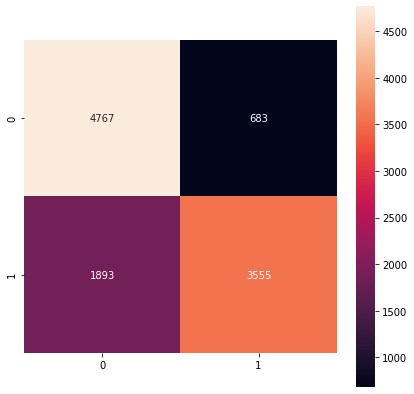

In [139]:
my_model.fit(X_train, Y_train)
y_predicted = my_model.predict(X_test)
print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))

matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()


### df_ok_NA

In [140]:
k_values = range(1,51,2)
param_grid = {'n_neighbors': k_values}

kNN_model_NA=KNeighborsClassifier()

grid_NA = GridSearchCV(kNN_model_NA, param_grid, cv = 3, scoring = 'accuracy',verbose = 3)
grid_NA.fit(X_train_NA,Y_train_NA)
print(grid_NA.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... n_neighbors=1, score=0.712, total=  10.9s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.715, total=  10.8s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.7s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.711, total=  11.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.740, total=  11.3s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.738, total=  11.2s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.732, total=  11.4s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.746, total=  11.8s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.756, total=  11.5s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.752, total=  11.8s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 16.6min finished


{'n_neighbors': 39}


In [141]:
my_model_NA = grid_NA.best_estimator_

Accuracy: 0.7595752405155201
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      5496
           1       0.83      0.65      0.73      5522

    accuracy                           0.76     11018
   macro avg       0.77      0.76      0.76     11018
weighted avg       0.77      0.76      0.76     11018

[[4768  728]
 [1921 3601]]


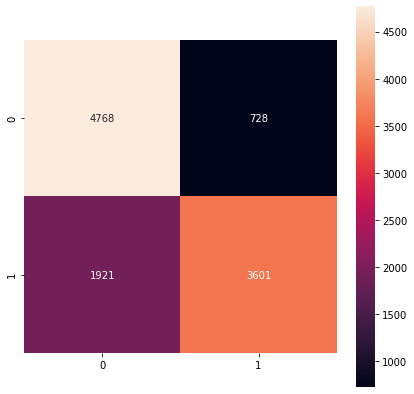

In [142]:
my_model_NA.fit(X_train_NA, Y_train_NA)
y_predicted_NA = my_model_NA.predict(X_test_NA)
print('Accuracy:',accuracy_score(Y_test_NA, y_predicted_NA))
print(classification_report(Y_test_NA, y_predicted_NA))

matrix = confusion_matrix(Y_test_NA, y_predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## SVM

### df1_ok

In [143]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(cache_size=5000), param_grid, cv=3, verbose = 3, refit = True)
  
# fitting the model for grid search
grid.fit(X_train, Y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.760, total=  35.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.764, total=  36.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.771, total=  36.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.759, total=  42.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=  42.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.764, total=  42.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.759, total=  32.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.764, total=  33.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.769, total=  33.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=5000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [144]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, break_ties=False, cache_size=5000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


Accuracy: 0.7658285924022756
              precision    recall  f1-score   support

           0       0.72      0.86      0.79      5450
           1       0.83      0.67      0.74      5448

    accuracy                           0.77     10898
   macro avg       0.78      0.77      0.76     10898
weighted avg       0.78      0.77      0.76     10898

[[4687  763]
 [1789 3659]]


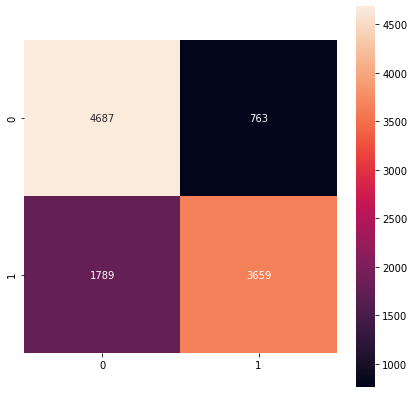

In [145]:
y_pred = grid.predict(X_test)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

matrix = confusion_matrix(Y_test, y_pred)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [146]:
# defining parameter range
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1],
              'kernel': ['rbf']} 
  
grid_NA = GridSearchCV(SVC(cache_size=5000), param_grid, cv=3, verbose = 3, refit = True)
  
# fitting the model for grid search
grid_NA.fit(X_train_NA, Y_train_NA)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.770, total=  48.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.764, total=  47.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.761, total=  47.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.771, total=  48.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.768, total=  48.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.761, total=  47.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.770, total=  43.6s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.767, total=  43.8s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.763, total=  43.3s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  9.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=5000,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [147]:
# print best parameter after tuning
print(grid_NA.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_NA.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=5000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy: 0.763205663459793
              precision    recall  f1-score   support

           0       0.72      0.86      0.78      5496
           1       0.83      0.66      0.74      5522

    accuracy                           0.76     11018
   macro avg       0.77      0.76      0.76     11018
weighted avg       0.77      0.76      0.76     11018

[[4748  748]
 [1861 3661]]


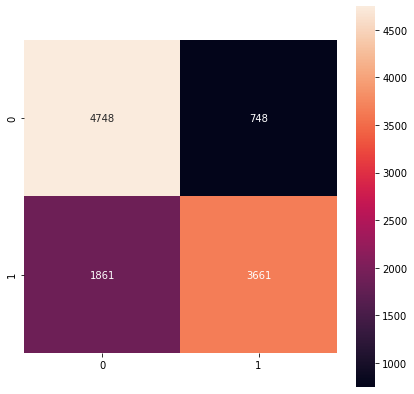

In [148]:
y_pred_NA = grid_NA.predict(X_test_NA)
  
# print classification report
print('Accuracy:',accuracy_score(Y_test_NA, y_pred_NA))
print(classification_report(Y_test_NA, y_pred_NA))

matrix = confusion_matrix(Y_test_NA, y_pred_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network

### df1_ok

In [113]:
def baseline_model():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [114]:
model = baseline_model()

history = model.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
77/77 [==============================] - 24s 23ms/step - loss: 0.7006 - binary_accuracy: 0.6482 - val_loss: 0.6823 - val_binary_accuracy: 0.7451
Epoch 2/50
77/77 [==============================] - 1s 12ms/step - loss: 0.5573 - binary_accuracy: 0.7417 - val_loss: 0.6784 - val_binary_accuracy: 0.7403
Epoch 3/50
77/77 [==============================] - 1s 13ms/step - loss: 0.5451 - binary_accuracy: 0.7539 - val_loss: 0.6649 - val_binary_accuracy: 0.7456
Epoch 4/50
77/77 [==============================] - 1s 12ms/step - loss: 0.5365 - binary_accuracy: 0.7588 - val_loss: 0.6520 - val_binary_accuracy: 0.7470
Epoch 5/50
77/77 [==============================] - 1s 13ms/step - loss: 0.5344 - binary_accuracy: 0.7584 - val_loss: 0.6265 - val_binary_accuracy: 0.7701
Epoch 6/50
77/77 [==============================] - 1s 12ms/step - loss: 0.5339 - binary_accuracy: 0.7615 - val_loss: 0.6168 - val_binary_accuracy: 0.7642
Epoch 7/50
77/77 [==============================] - 1s 12ms/step - lo

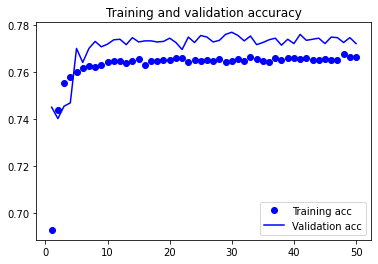

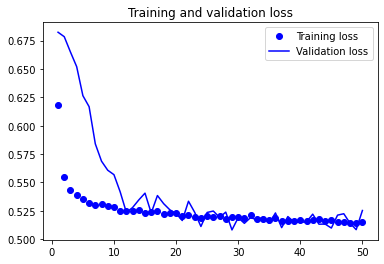

In [115]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

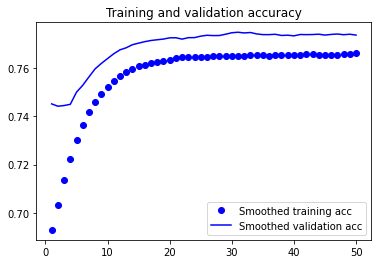

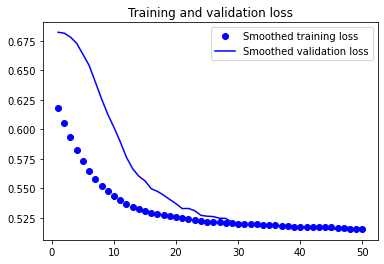

In [116]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [117]:
model.evaluate(X_test, Y_test)

341/341 [==============================] - 1s 3ms/step - loss: 0.5296 - binary_accuracy: 0.7664


[0.5296302437782288, 0.766379177570343]

Total accuracy: 76.6379152138007 %
[[4684  766]
 [1780 3668]]


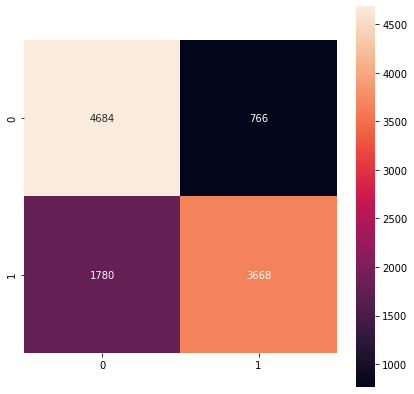

In [118]:
predicted = np.array([int(x[0] > 0.5) for x in model.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [119]:
def baseline_model_NA():
  model = Sequential()
  model.add(Dense(2000, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='relu')),
  model.add(Dropout(0.5)),
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [120]:
model_NA = baseline_model_NA()

history = model_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
78/78 [==============================] - 4s 20ms/step - loss: 0.6778 - binary_accuracy: 0.6557 - val_loss: 0.6829 - val_binary_accuracy: 0.6422
Epoch 2/50
78/78 [==============================] - 1s 14ms/step - loss: 0.5567 - binary_accuracy: 0.7447 - val_loss: 0.6748 - val_binary_accuracy: 0.6580
Epoch 3/50
78/78 [==============================] - 1s 13ms/step - loss: 0.5423 - binary_accuracy: 0.7595 - val_loss: 0.6537 - val_binary_accuracy: 0.7325
Epoch 4/50
78/78 [==============================] - 1s 13ms/step - loss: 0.5366 - binary_accuracy: 0.7617 - val_loss: 0.6283 - val_binary_accuracy: 0.7568
Epoch 5/50
78/78 [==============================] - 1s 13ms/step - loss: 0.5308 - binary_accuracy: 0.7690 - val_loss: 0.6037 - val_binary_accuracy: 0.7661
Epoch 6/50
78/78 [==============================] - 1s 13ms/step - loss: 0.5234 - binary_accuracy: 0.7717 - val_loss: 0.5811 - val_binary_accuracy: 0.7701
Epoch 7/50
78/78 [==============================] - 1s 13ms/step - los

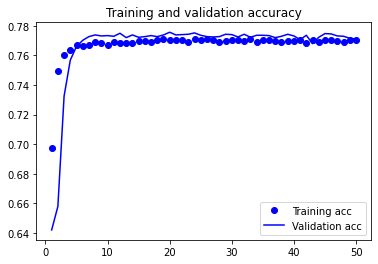

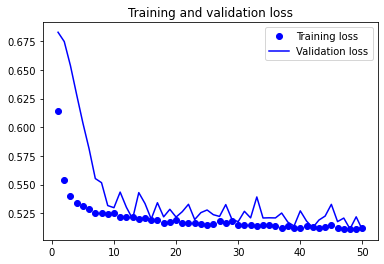

In [121]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

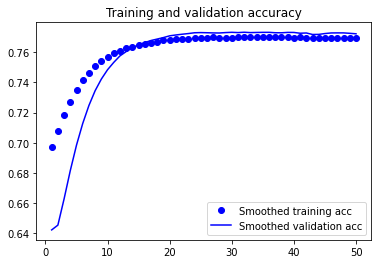

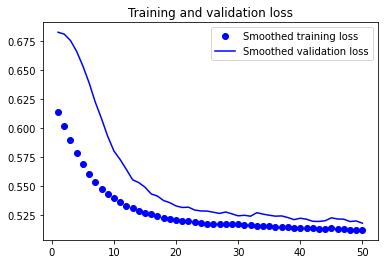

In [122]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [123]:
model_NA.evaluate(X_test_NA, Y_test_NA)

345/345 [==============================] - 1s 3ms/step - loss: 0.5216 - binary_accuracy: 0.7634


[0.5215916037559509, 0.7633872032165527]

Total accuracy: 76.33871846070068 %
[[4821  675]
 [1932 3590]]


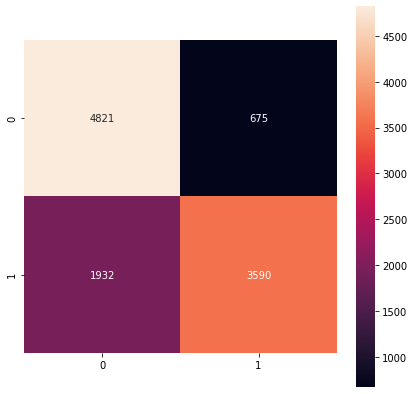

In [124]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Neural Network V2

### df1_ok

In [125]:
def baseline_model2():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [126]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
77/77 [==============================] - 2s 9ms/step - loss: 0.8247 - binary_accuracy: 0.5656 - val_loss: 0.6329 - val_binary_accuracy: 0.4960
Epoch 2/50
77/77 [==============================] - 0s 4ms/step - loss: 0.6083 - binary_accuracy: 0.7108 - val_loss: 0.5908 - val_binary_accuracy: 0.7114
Epoch 3/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5626 - binary_accuracy: 0.7343 - val_loss: 0.5610 - val_binary_accuracy: 0.7421
Epoch 4/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5533 - binary_accuracy: 0.7379 - val_loss: 0.5354 - val_binary_accuracy: 0.7628
Epoch 5/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5403 - binary_accuracy: 0.7455 - val_loss: 0.5206 - val_binary_accuracy: 0.7722
Epoch 6/50
77/77 [==============================] - 0s 4ms/step - loss: 0.5351 - binary_accuracy: 0.7530 - val_loss: 0.5127 - val_binary_accuracy: 0.7717
Epoch 7/50
77/77 [==============================] - 0s 4ms/step - loss: 0.52

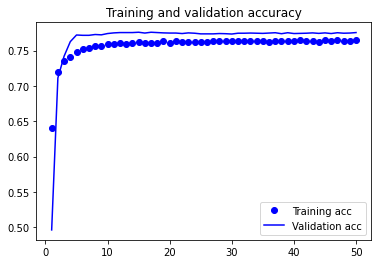

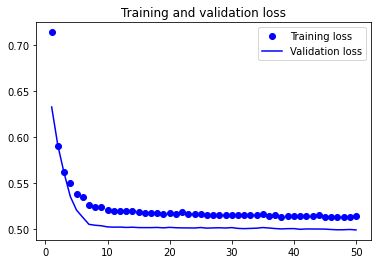

In [127]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

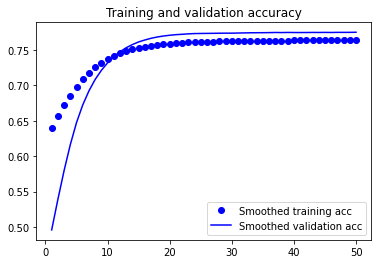

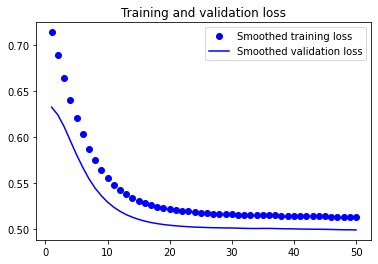

In [128]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [129]:
model2.evaluate(X_test, Y_test)

341/341 [==============================] - 1s 2ms/step - loss: 0.5077 - binary_accuracy: 0.7657


[0.5077393054962158, 0.7657368183135986]

Total accuracy: 76.57368324463204 %
[[4719  731]
 [1822 3626]]


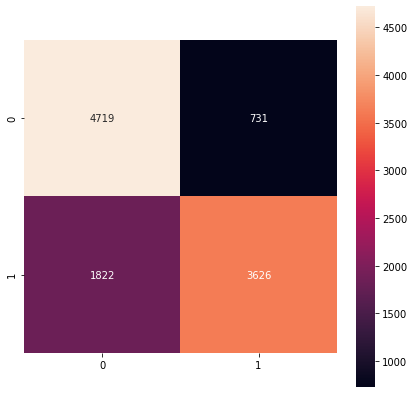

In [130]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_NA

In [131]:
def baseline_model2_NA():
  model = Sequential()
  model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  return model

In [132]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  workers=-1)

Epoch 1/50
78/78 [==============================] - 2s 9ms/step - loss: 0.7189 - binary_accuracy: 0.6547 - val_loss: 0.5571 - val_binary_accuracy: 0.7633
Epoch 2/50
78/78 [==============================] - 0s 4ms/step - loss: 0.5771 - binary_accuracy: 0.7319 - val_loss: 0.5378 - val_binary_accuracy: 0.7642
Epoch 3/50
78/78 [==============================] - 0s 4ms/step - loss: 0.5468 - binary_accuracy: 0.7458 - val_loss: 0.5210 - val_binary_accuracy: 0.7710
Epoch 4/50
78/78 [==============================] - 0s 4ms/step - loss: 0.5341 - binary_accuracy: 0.7537 - val_loss: 0.5115 - val_binary_accuracy: 0.7699
Epoch 5/50
78/78 [==============================] - 0s 5ms/step - loss: 0.5240 - binary_accuracy: 0.7622 - val_loss: 0.5065 - val_binary_accuracy: 0.7715
Epoch 6/50
78/78 [==============================] - 0s 4ms/step - loss: 0.5184 - binary_accuracy: 0.7633 - val_loss: 0.5046 - val_binary_accuracy: 0.7731
Epoch 7/50
78/78 [==============================] - 0s 4ms/step - loss: 0.51

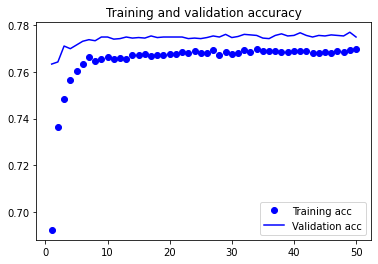

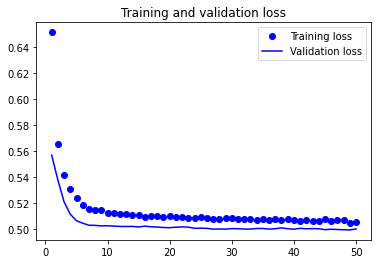

In [133]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

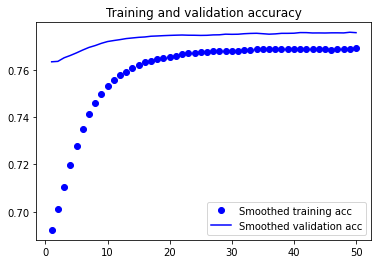

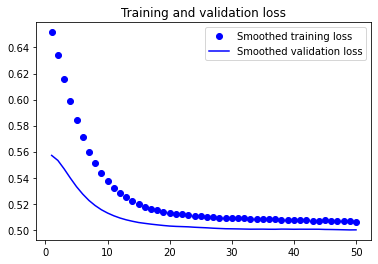

In [134]:
def smooth_curve(points, factor=0.8): 
  smoothed_points = []
  for point in points:
      if smoothed_points:
          previous = smoothed_points[-1]
          smoothed_points.append(previous * factor + point * (1 - factor))
      else: 
          smoothed_points.append(point)
  return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [135]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

345/345 [==============================] - 1s 2ms/step - loss: 0.5096 - binary_accuracy: 0.7648


[0.5095843076705933, 0.7648393511772156]

Total accuracy: 76.48393537847159 %
[[4749  747]
 [1844 3678]]


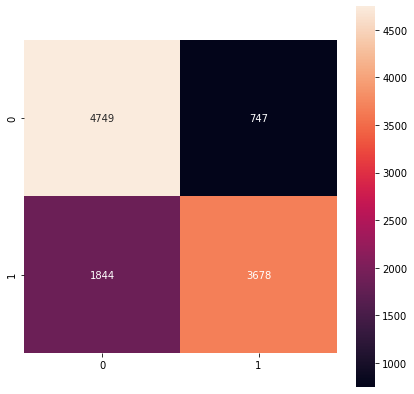

In [136]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()